# DATA ANALYSIS

## Import the required libraries

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns

## Load the dataset

In [3]:
data=pd.read_csv("Regression_data.csv")
#Knowing about the dataset shape
print("Dataset Shape:",data.shape,"\n")

Dataset Shape: (30000, 24) 



## Find the missing values  

Missing Values:
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64
Percentages for missing values:
Customer ID                     0.000000
Name                            0.

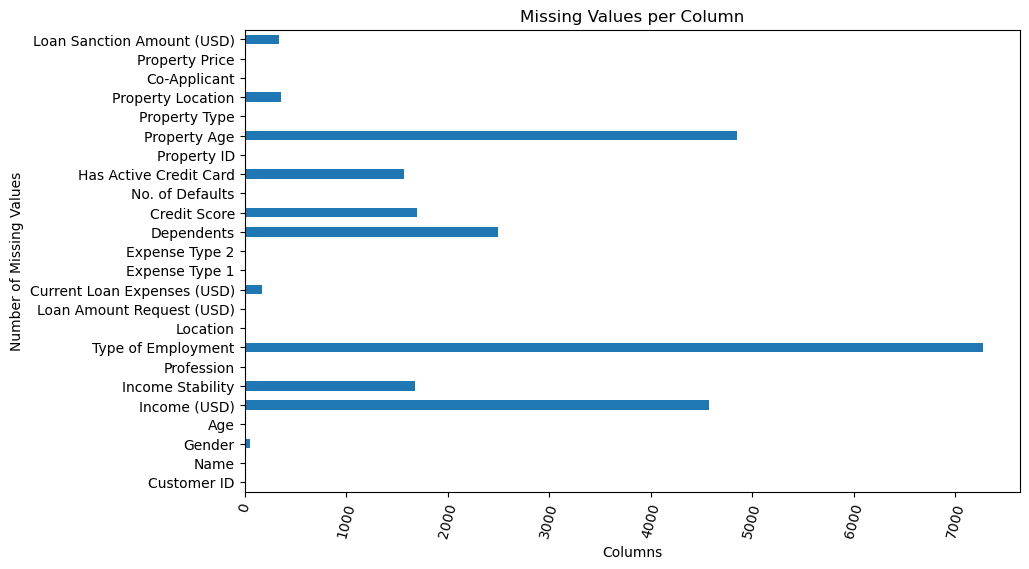

In [4]:
#Finding Missing Values
missing_values=data.isnull().sum()
print("Missing Values:")
print(missing_values)
print("Percentages for missing values:")
missing_percentage = (missing_values/ len(data)) * 100
print(missing_percentage,"\n")
total_missing=missing_values.sum()
print("Total Missing Values:",total_missing,"\n")
#Visualizing Missing Values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='barh')#barh for horizontal representation
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=75)
plt.show()

## Checking for duplicate values in dataset

In [5]:
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print(f'Number of duplicate rows: {num_duplicates}\n')

Number of duplicate rows: 0



## Checking for noise and outliers in the dataset

Outliers (Z-score):
Number of outliers per column (Z-score):
Age                              0
Income (USD)                     0
Loan Amount Request (USD)      394
Current Loan Expenses (USD)      0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Property ID                      0
Property Age                     0
Property Type                    0
Co-Applicant                   168
Property Price                 405
Loan Sanction Amount (USD)       0
dtype: int64


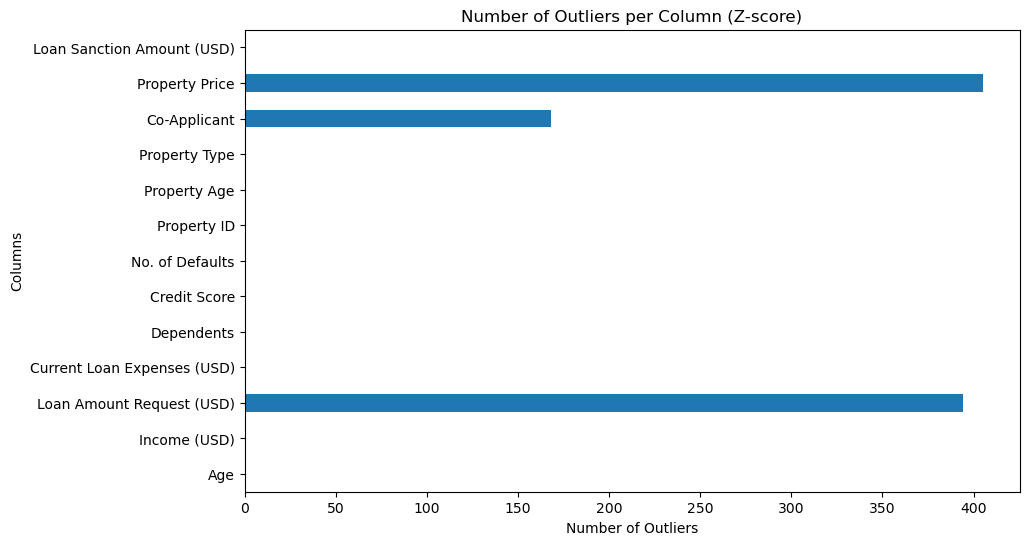

In [6]:
z_scores = zscore(data.select_dtypes(include=['float64', 'int64']))
outliers_zscore = (z_scores > 3) | (z_scores < -3)
num_outliers_zscore = outliers_zscore.sum(axis=0)
print("Outliers (Z-score):")
print(f'Number of outliers per column (Z-score):\n{num_outliers_zscore}')
#Visualize Outliers(noise)
plt.figure(figsize=(10, 6))
num_outliers_zscore.plot(kind='barh')
plt.title('Number of Outliers per Column (Z-score)')
plt.xlabel('Number of Outliers')
plt.ylabel('Columns')
plt.show()